# Building Trees using scikit-learn - Lab

## Introduction

Following the simple example you saw in the previous lesson, you'll now build a decision tree for a more complex dataset. This lab covers all major areas of standard machine learning practice, from data acquisition to evaluation of results. We'll continue to use the Scikit-learn and Pandas libraries to conduct this analysis, following the same structure we saw in the previous lesson.

## Objectives

In this lab you will:

- Use scikit-learn to fit a decision tree classification model 
- Use entropy and information gain to identify the best attribute to split on at each node 
- Plot a decision tree using Python 

## UCI Banknote authentication dataset

In this lab, you'll work with a popular dataset for classification called the "UCI Bank note authentication dataset". This data was extracted from images that were taken from genuine and forged banknotes! The notes were first digitized, followed by a numerical transformation using DSP techniques. The final set of engineered features are all continuous in nature, meaning that our dataset consists entirely of floats, with no strings to worry about. If you're curious about how the dataset was created, you can visit the UCI link [here](https://archive.ics.uci.edu/ml/datasets/banknote+authentication)!

We have the following attributes in the dataset:  

1. __Variance__ of wavelet transformed image (continuous) 
2. __Skewness__ of wavelet transformed image (continuous) 
3. __Curtosis__ of wavelet transformed image (continuous) 
4. __Entropy__ of image (continuous) 
5. __Class__ (integer) - Target/Label 

## Step 1: Import the necessary libraries 

We've imported all the necessary modules you will require for this lab, go ahead and run the following cell: 

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree

## Step 2: Import data

Now, you'll load our dataset in a DataFrame, perform some basic EDA, and get a general feel for the data you'll be working with.

- Import the file `'data_banknote_authentication.csv'` as a pandas DataFrame. Note that there is no header information in this dataset 
- Assign column names `'Variance'`, `'Skewness'`, `'Kurtosis'`, `'Entropy'`, and `'Class'` to the dataset in the given order 
- View the basic statistics and shape of the dataset 
- Check for the frequency of positive and negative examples in the target variable

In [2]:
# Create DataFrame
df = pd.read_csv('data_banknote_authentication.csv', header=None)
df.columns = ['Variance', 'Skewness', 'Kurtosis', 'Entropy', 'Class']

# View basic statistics
print(df.describe())

# View shape of the dataset
print(df.shape)

# Check the frequency of positive and negative examples in the target variable
print(df['Class'].value_counts())


          Variance     Skewness     Kurtosis      Entropy        Class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
(1372, 5)
Class
0    762
1    610
Name: count, dtype: int64


In [4]:
# Describe the dataset
df.describe()


,Variance,Skewness,Kurtosis,Entropy,Class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
# Shape of dataset
df.shape


(1372, 5)

In [6]:
# Class frequency of target variable 
df['Class'].value_counts()


Class
0    762
1    610
Name: count, dtype: int64

## Step 3: Create features, labels, training, and test data

Now we need to create our feature set `X` and labels `y`:  
- Create `X` and `y` by selecting the appropriate columns from the dataset
- Create a 80/20 split on the dataset for training/test. Use `random_state=10` for reproducibility

In [7]:
# Create features and labels
X = df.drop('Class', axis=1)
y = df['Class']


In [8]:
# Perform an 80/20 split
train_test_split(X, y, test_size=0.2, random_state=42)

[      Variance  Skewness  Kurtosis   Entropy
 529   -1.38850   12.5026   0.69118 -7.548700
 243    2.77440    6.8576  -1.06710  0.075416
 1309  -4.28870   -7.8633  11.83870 -1.897800
 664    5.35860    3.7557  -1.73450  1.078900
 745    0.75736    3.0294   2.91640 -0.068117
 ...        ...       ...       ...       ...
 1095   1.16400    3.9130  -4.55440 -3.867200
 1130  -2.29180   -7.2570   7.95970  0.921100
 1294  -7.03640    9.2931   0.16594 -4.539600
 860   -3.46050    2.6901   0.16165 -1.022400
 1126  -3.35820   -7.2404  11.44190 -0.571130
 
 [1097 rows x 4 columns],
       Variance   Skewness  Kurtosis  Entropy
 430   1.569100   6.346500   -0.1828 -2.40990
 588  -0.278020   8.188100   -3.1338 -2.52760
 296   0.051979   7.052100   -2.0541 -3.15080
 184  -1.755900  11.945900    3.0946 -4.89780
 244   2.428700   9.382100   -3.2477 -1.45430
 ...        ...        ...       ...      ...
 1341 -2.262500  -0.099335    2.8127  0.48662
 1100  1.437800   0.668370   -2.0267  1.02710
 620  

## Step 4: Train the classifier and make predictions
- Create an instance of a decision tree classifier with `random_state=10` for reproducibility
- Fit the training data to the model 
- Use the trained model to make predictions with test data

In [9]:
# Train a DT classifier
classifier = DecisionTreeClassifier(random_state=10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)


In [10]:
y_pred = classifier.predict(X_test)


## Step 5: Check predictive performance

Use different evaluation measures to check the predictive performance of the classifier: 
- Check the accuracy, AUC, and create a confusion matrix 
- Interpret the results 

In [11]:
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix

# Calculate accuracy 
acc = accuracy_score(y_test, y_pred)
print('Accuracy is :{0}'.format(acc))

# Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print('\nAUC is :{0}'.format(round(roc_auc, 2)))

# Create and print a confusion matrix 
print('\nConfusion Matrix')
print('----------------')
print(confusion_matrix(y_test, y_pred))

Accuracy is :0.9781818181818182

AUC is :0.98

Confusion Matrix
----------------
[[147   1]
 [  5 122]]


## Level up (Optional)


### Re-grow the tree using entropy 

The default impurity criterion in scikit-learn is the Gini impurity. We can change it to entropy by passing in the argument `criterion='entropy'` to the classifier in the training phase.  

- Create an instance of a decision tree classifier with `random_state=10` for reproducibility. Make sure you use entropy to calculate impurity 
- Fit this classifier to the training data 
- Run the given code to plot the decision tree

In [12]:
# Instantiate and fit a DecisionTreeClassifier using entropy
classifier_2 = DecisionTreeClassifier(criterion='entropy', random_state=10)
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=10)

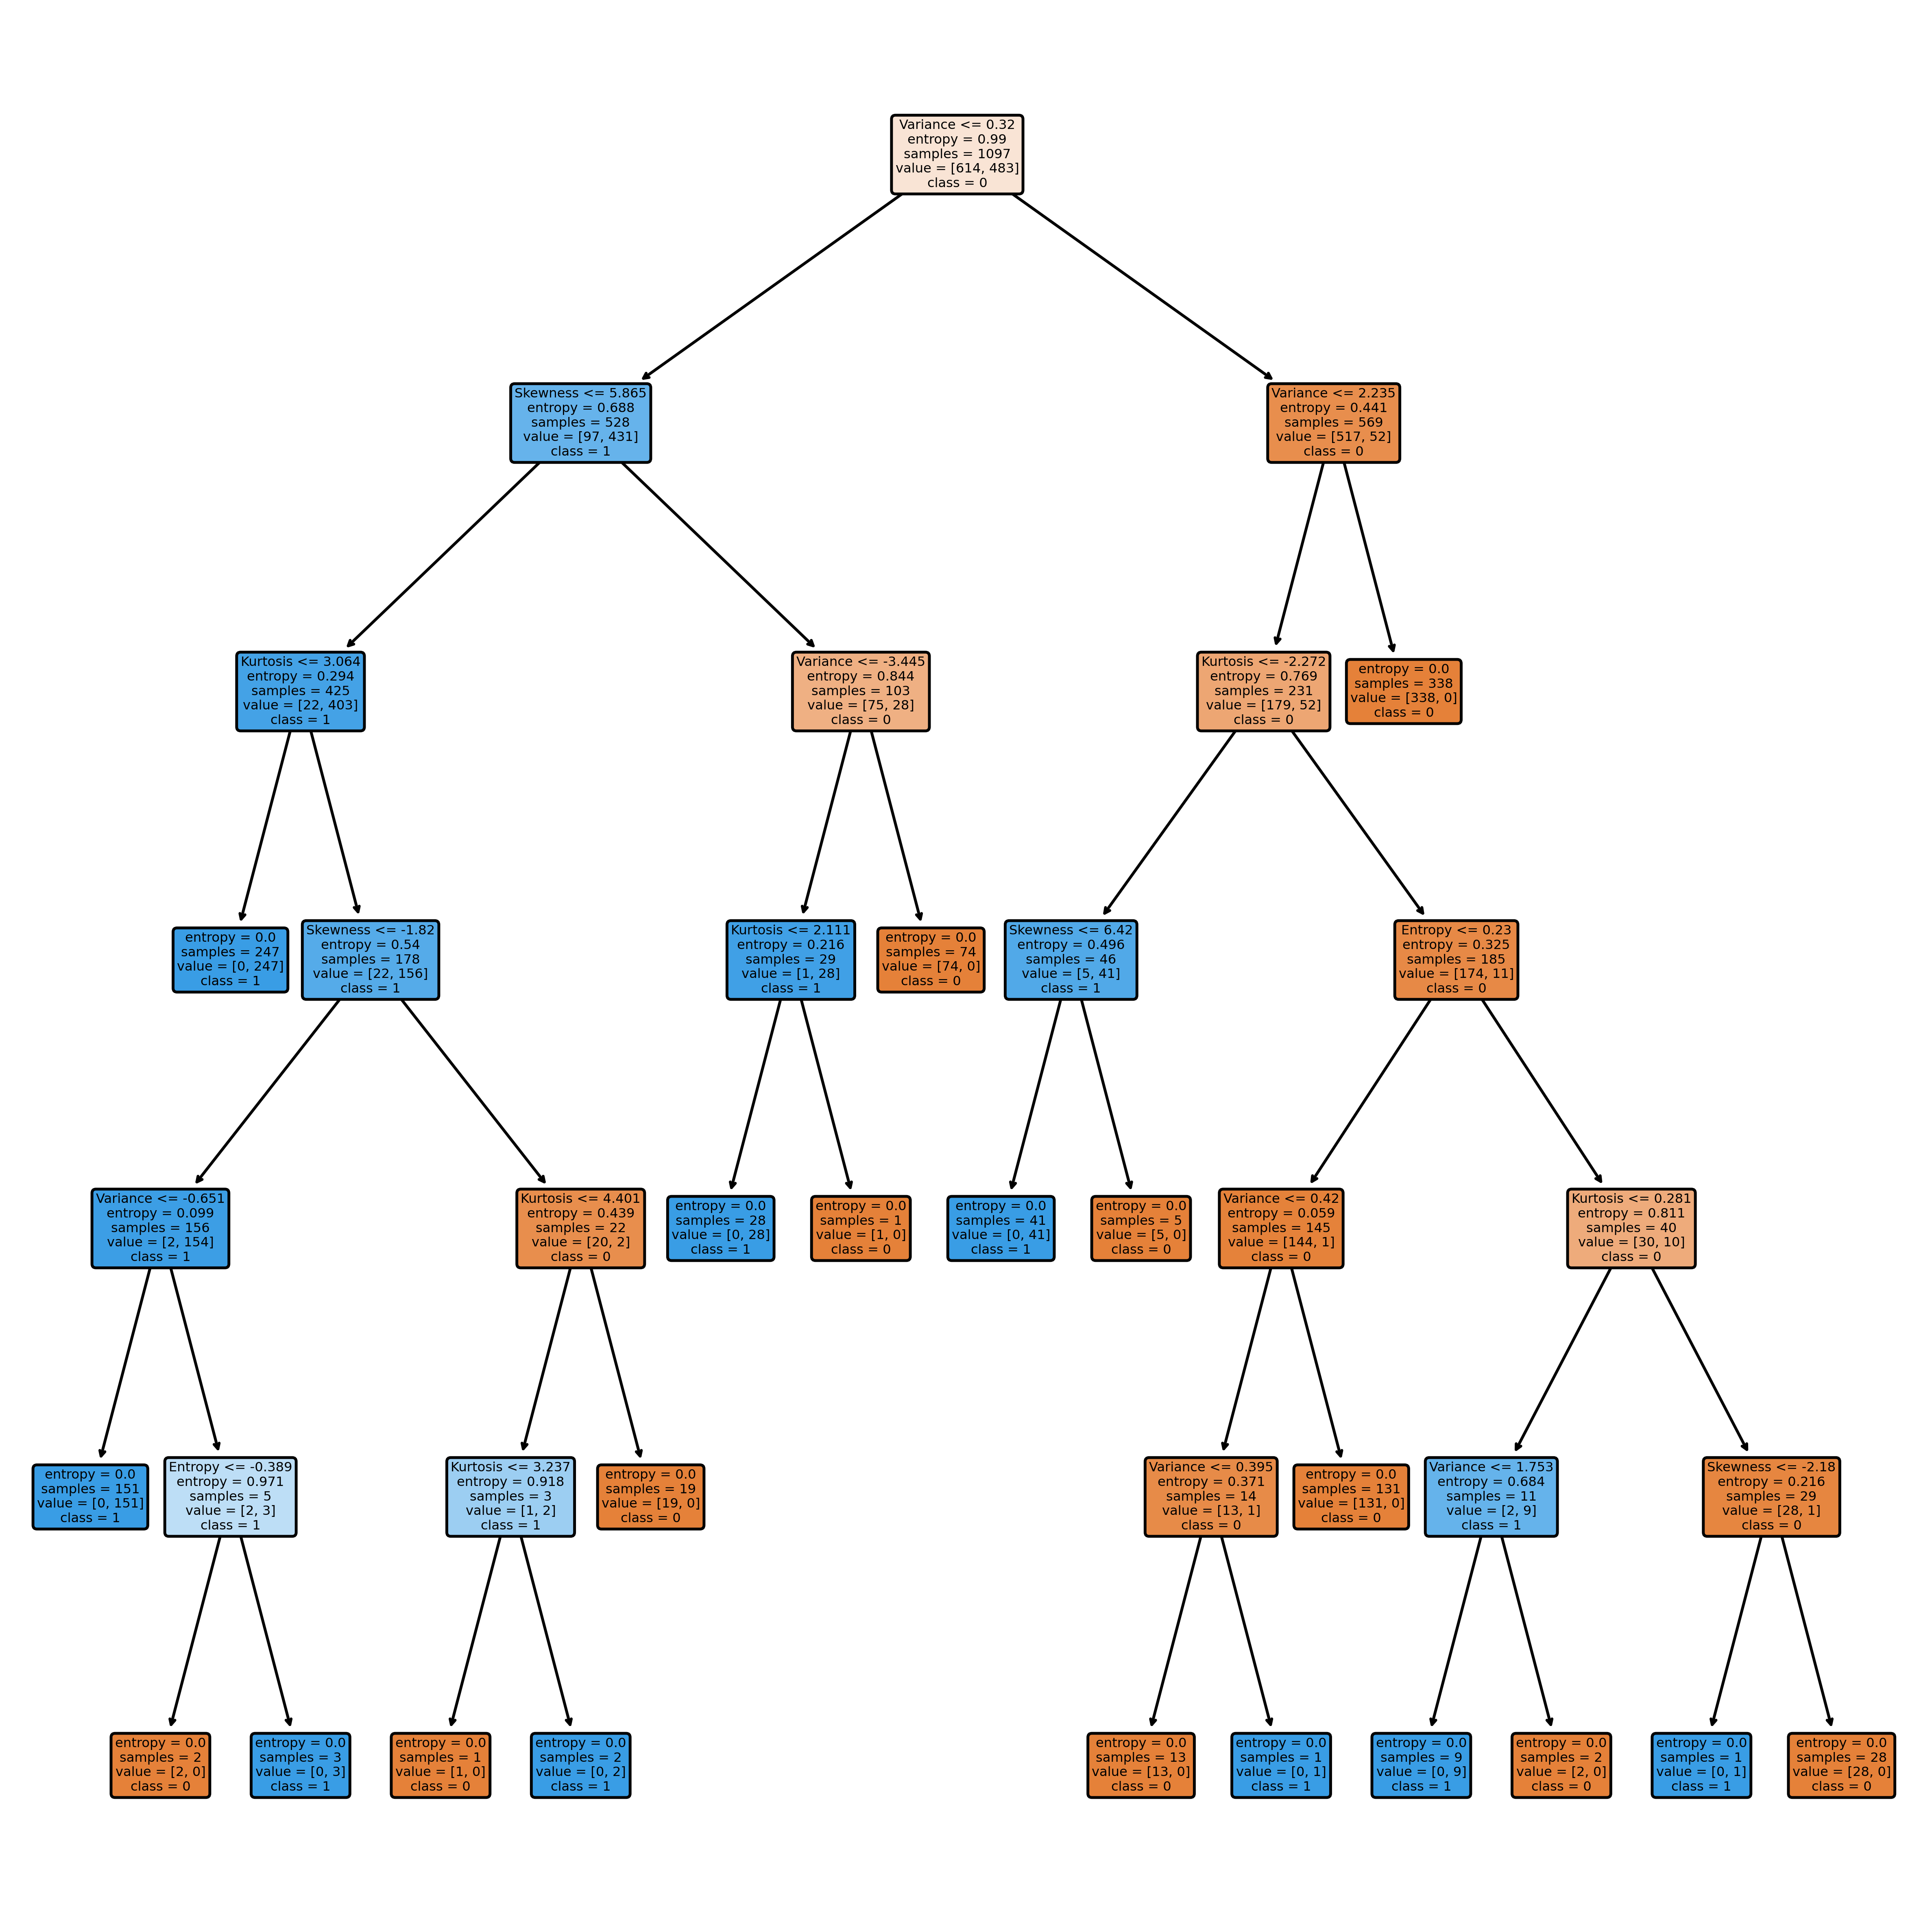

In [13]:
# Plot and show decision tree
plt.figure(figsize=(12,12), dpi=500)
tree.plot_tree(classifier_2, 
               feature_names=X.columns,
               class_names=np.unique(y).astype('str'),
               filled=True, rounded=True)
plt.show()

- We discussed earlier that decision trees are very sensitive to outliers. Try to identify and remove/fix any possible outliers in the dataset.

In [14]:
from scipy import stats

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df.drop('Class', axis=1)))

# Filter out rows with Z-scores greater than 3
df_no_outliers = df[(z_scores < 3).all(axis=1)]

# Display the shape of the new dataset
print(df_no_outliers.shape)


(1336, 5)


- Check the distributions of the data. Is there any room for normalization/scaling of the data? Apply these techniques and see if it improves the accuracy score.

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

# Train a new classifier on the scaled data
classifier_scaled = DecisionTreeClassifier(random_state=10)
classifier_scaled.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_scaled = classifier_scaled.predict(X_test_scaled)

# Calculate the accuracy of the scaled model
acc_scaled = accuracy_score(y_test, y_pred_scaled)
print('Accuracy after scaling is :{0}'.format(acc_scaled))

Accuracy after scaling is :0.9781818181818182


## Summary 

In this lesson, we looked at growing a decision tree for the banknote authentication dataset, which is composed of extracted continuous features from photographic data. We looked at data acquisition, training, prediction, and evaluation. We also looked at growing trees using entropy vs. gini impurity criteria. In following lessons, we shall look at more pre-training tuning techniques for ensuring an optimal classifier for learning and prediction.  